# **_Visualizing the Law of Large Numbers and the Central Limit Theorem_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

This Python Jupyter Notebook utilizes concepts I learned in the **Probability Theory** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Mike X. Cohen's website: https://www.mikexcohen.com

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

## **_Goal_**

Demonstrate the Law of Large Numbers and the Central Limit Theorem:

-   Compute example distributions

-   Analyze

-   Visualize

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

## **_The Law of Large Numbers_**

<div style="width: 90%; text-align: center;">

<font size=5 style="font-family: Courier; font-weight: 700; color: ivory; text-shadow: orangered 0.05rem 0.05rem 0.65rem, goldenrod 0.05rem -0.05rem 0.65rem, dodgerblue -0.05rem -0.05rem 0.65rem; magenta -0.05rem 0.05rem 0.65rem">

The law of large number is one of several mathematical theorems expressing the idea that as the number of trials of a random process increases, the percentage difference between the expected and actual result values goes to zero. 

</font>

<font size=3>[**Wolfram MathWorld**](https://mathworld.wolfram.com/classroom/LawofLargeNumbers.html)</font>

</div>

In [4]:
# Import libraries:
import matplotlib.pyplot as plt
import numpy as np

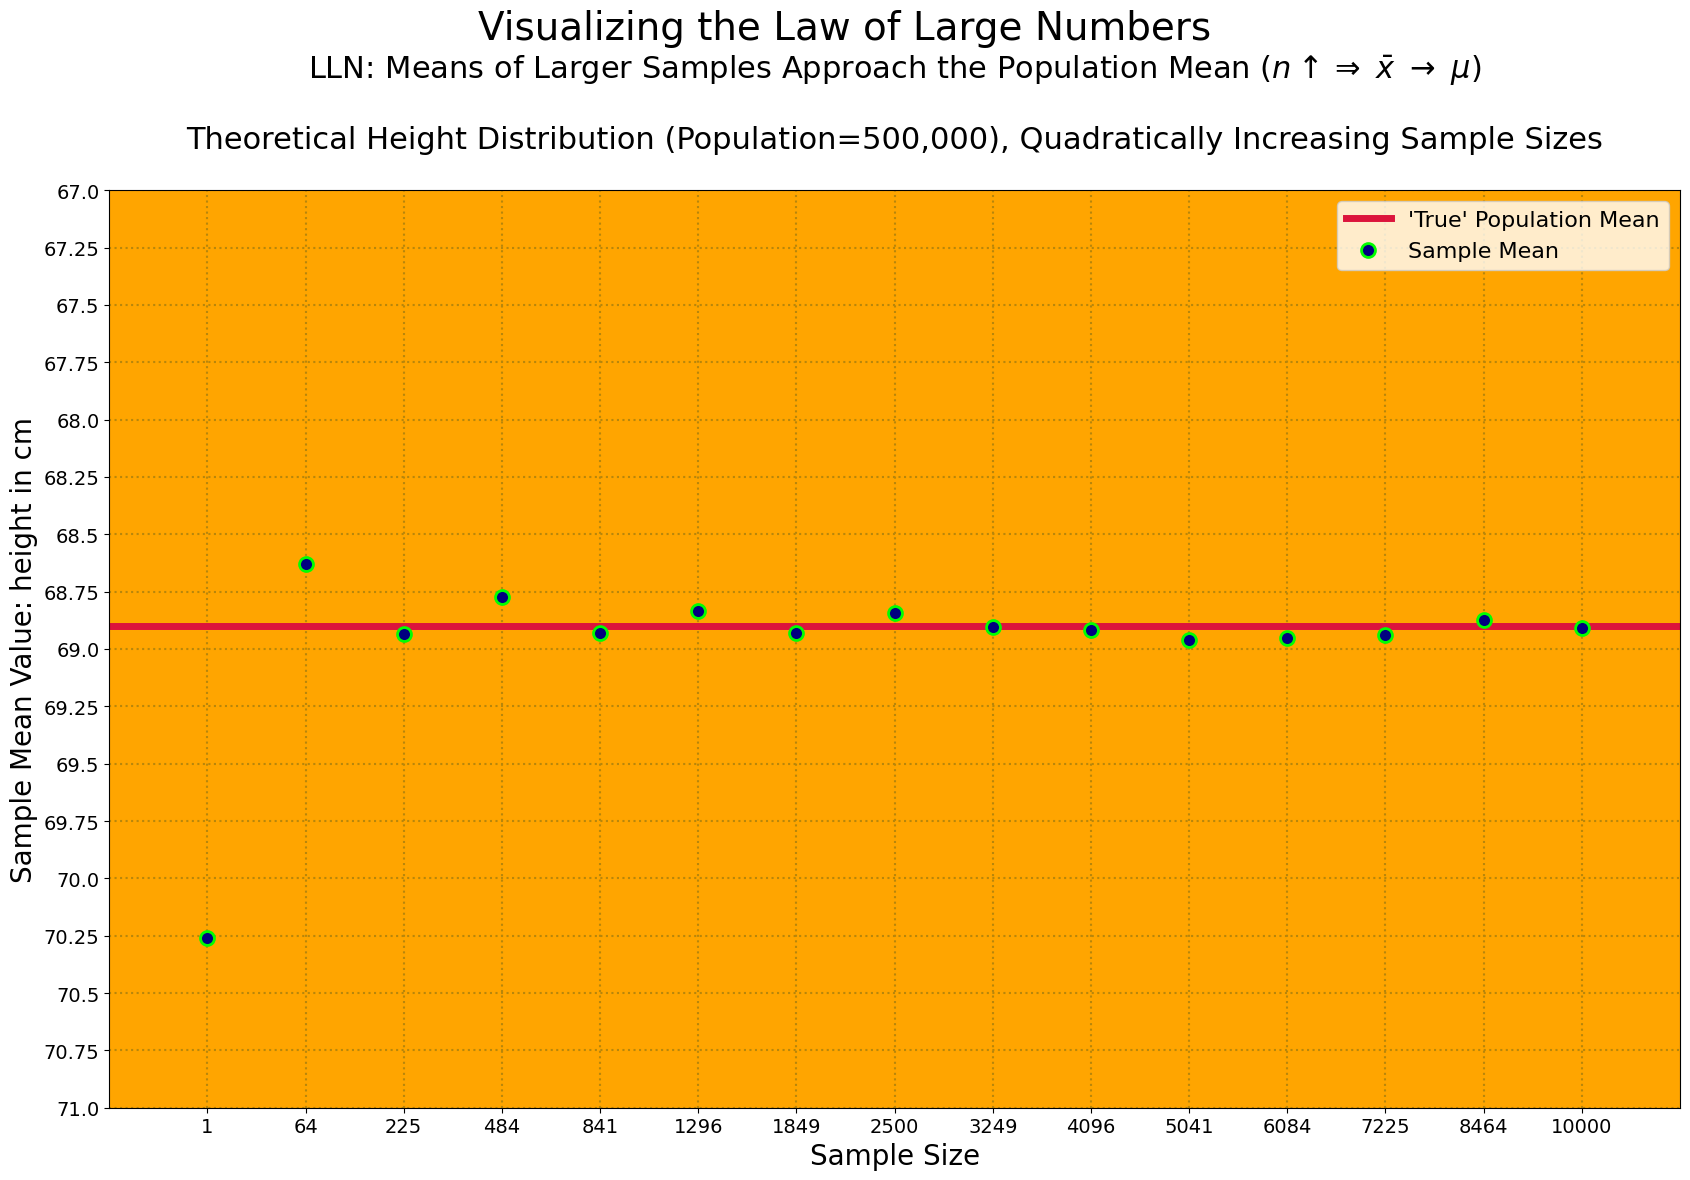

In [5]:
# Theoretical population distribution size:
pop_size = 500000

# Number of times to run the experiment with increasing sample sizes:
n_experiments = 15
# Array of increasing sample sizes (quadratically increasing):
sample_sizes = np.linspace(1, 100, n_experiments, dtype=int)**2
# Array of sample means to populate:
sample_means = np.zeros((len(sample_sizes)))

# Optionally, create a repeatable distribution:
# np.random.seed(1)

# Mean and standard deviation roughly approximate that of
#  US population parameters:
mu, sigma = 68.9, 2.95
# Theoretical true population, representing heights
#  of *all* citizens of a hypothetical locale.
pop_heights = np.random.normal(loc=mu, scale=sigma, size=pop_size)

# Compute and store the means of increasing samples sizes:
for j in range((len(sample_sizes))):
    sample = np.random.choice(pop_heights, size=sample_sizes[j])
    sample_means[j] = np.mean(sample)

# The mean of all the sample means we've stored:
sample_means_mean = np.round(np.mean(sample_means))

# Calculate vertical limit to squarely center the plot:
y_bound = np.ceil(max(np.max(sample_means) - sample_means_mean, sample_means_mean - np.min(sample_means)))
y_max = sample_means_mean + y_bound
y_min = sample_means_mean - y_bound

# Instantiate visualization:
fig, ax = plt.subplots(figsize=(17, 12))

# Plot the 'true' population:
ax.plot(
    [-1, (len(sample_sizes)) + 1],
    [np.mean(pop_heights), np.mean(pop_heights)],
    lw=5,
    c="crimson",
    label="'True' Population Mean",
)

# Plot the accumulated sample means. They should
#  converge toward the true population mean:
ax.plot(
    range(1, (len(sample_sizes)) + 1),
    sample_means,
    '.',
    c="navy",
    ms=20,
    mec="lime",
    mew=2,
    label="Sample Mean",
)

# Do the labeling and ticking and whatnot:
ax.set_xlabel("Sample Size", size=20)
x_tick_range = np.arange(1, (len(sample_sizes)) + 1)
ax.set_xticks(x_tick_range)
ax.set_xticklabels(sample_sizes, fontsize=14)
ax.set_xlim(0, (len(sample_sizes)) + 1)

ax.set_ylabel("Sample Mean Value: height in cm", size=20)
y_ticks = np.arange(y_min, y_max + 0.01, 0.25)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=14)
ax.set_ylim(y_max, y_min)

# Make a descriptive title:
title = "LLN: Means of Larger Samples Approach the Population Mean "
title += "($n \\uparrow \\Rightarrow$ $\\bar{x}$ $\\rightarrow$ $\\mu$)\n\n"
title += f"Theoretical Height Distribution (Population={pop_size:,})"
title += ", Quadratically Increasing Sample Sizes\n"
ax.set_title(title, size=22)

# Make the background color cool:
ax.grid(color="darkgoldenrod", ls=":", lw=1.5)
ax.set_facecolor("orange")
ax.legend(fontsize=16)

# Broad title:
fig.suptitle("Visualizing the Law of Large Numbers", size=28)

# Fit everything nicely:
plt.tight_layout()

# Do it:
plt.show()

Yep -- the sample means do converge upon the population mean as their sizes increase.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

## **_The Central Limit Theorem_**

<div style="width: 90%; text-align: center;">

<font size=5 style="font-family: Courier; font-weight: 700; color: ivory; text-shadow: orangered 0.05rem 0.05rem 0.65rem, goldenrod 0.05rem -0.05rem 0.65rem, dodgerblue -0.05rem -0.05rem 0.65rem; magenta -0.05rem 0.05rem 0.65rem">

The central limit theorem states that any set of variates with a distribution having a finite mean and variance tends to the normal distribution. 

</font>

<font size=3>[**Wolfram MathWorld**](https://mathworld.wolfram.com/classroom/CentralLimitTheorem.html)</font>

</div>

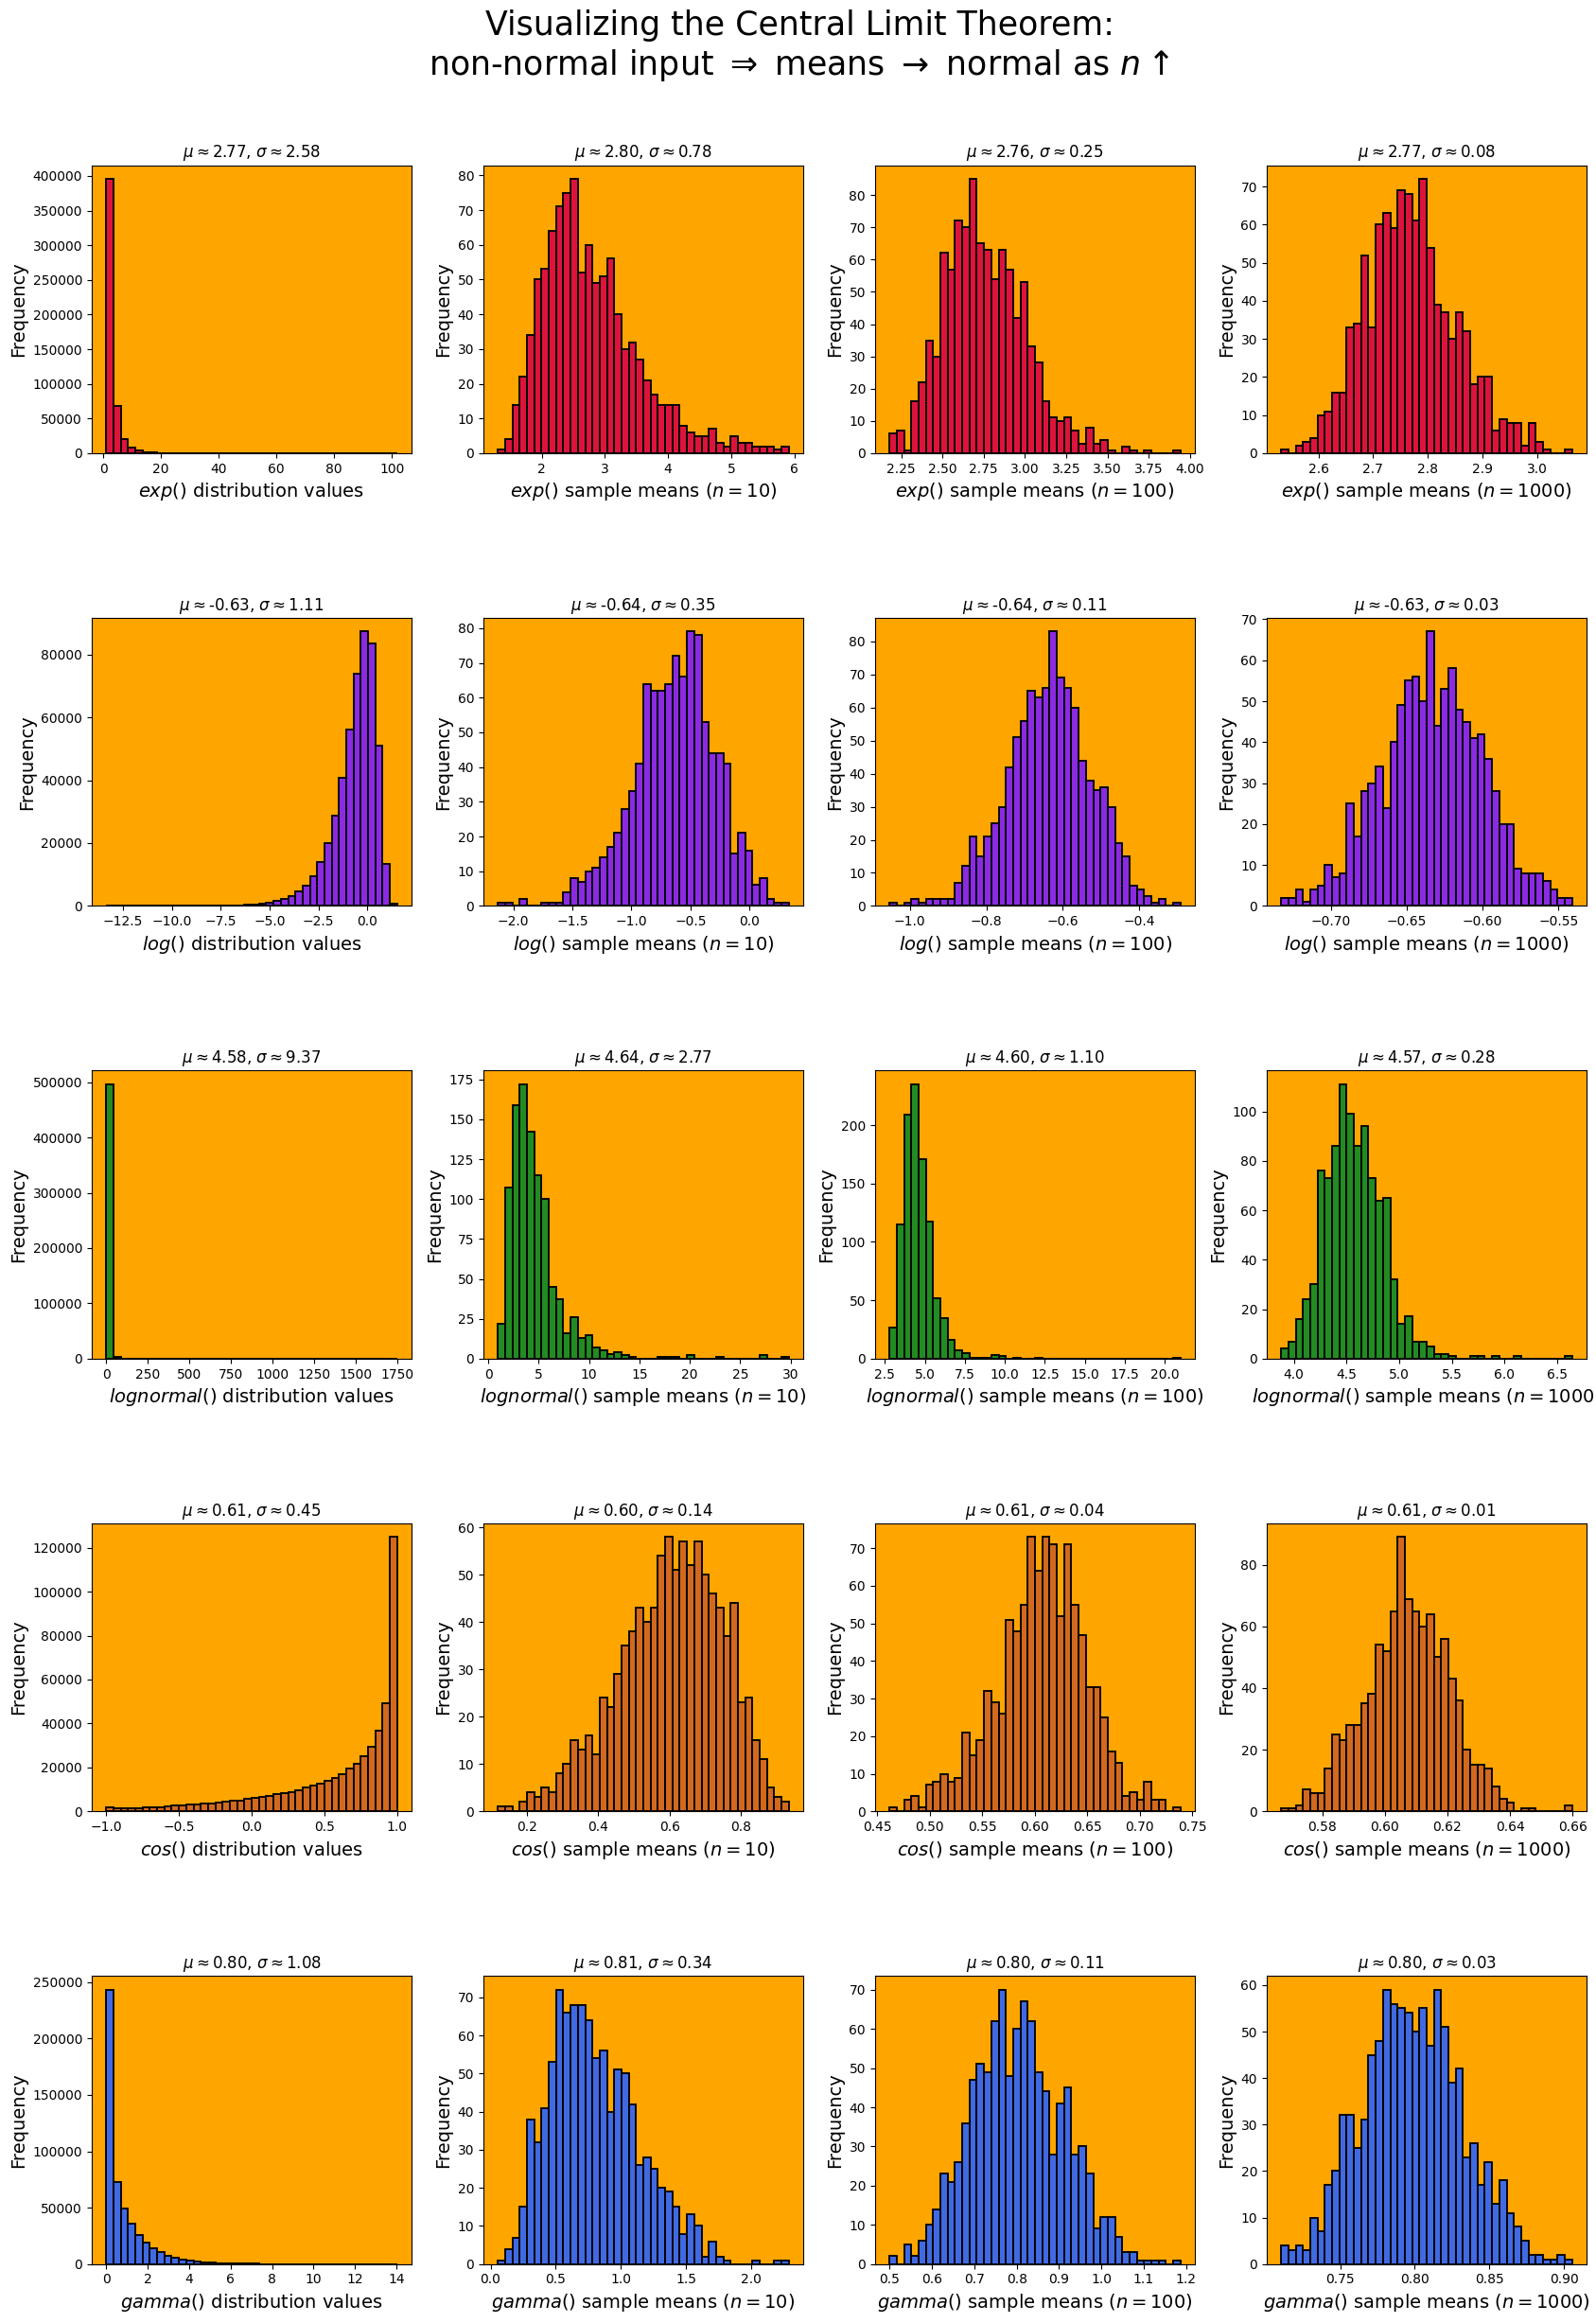

In [6]:
# Population size:
N = 500000


def ax_title(dist):
    """Makes short work of inserting this custom title."""
    mean_str = f"\n\n$\\mu\\approx${np.mean(dist):.2f}"
    std_dev_str = f"$\\sigma\\approx${np.std(dist):.2f}"
    return f"\n\n{mean_str}, {std_dev_str}"


def sample_x_label(func_name, dist_size):
    """Ibid, but for the x-axis label."""
    return f"${func_name}()$ sample means ($n={dist_size}$)"


# Normal, base distribution to distort for CLT analysis:
base = np.abs(np.random.randn(N))
# Functions to de-normalize the base normal distribution:
funcs = [np.exp, np.log, np.random.lognormal, np.cos, np.random.gamma]
# Spice up and distinguish the plots:
colors = ['crimson', 'blueviolet', 'forestgreen', 'chocolate', 'royalblue']

# Instantiate figure and axes:
fig, axes = plt.subplots(len(funcs), 4, figsize=(17, 25))

# Chane the base distribution by each of above functions.
# Analyze via CLT for each distortion:
for i in range(len(funcs)):
    # Call the distorting function:
    dist = funcs[i](base)
    # Number of repetitions to run for each distorting function:
    n_experiments = 1000

    # Small, medium and large sample sizes to compare:
    sample_size_sm = 10
    sample_size_med = 100
    sample_size_lg = 1000

    # Instantiate different sized zeros arrays to populate
    #  for each function:
    sample_means_sm = np.zeros(n_experiments)
    sample_means_med = np.zeros(n_experiments)
    sample_means_lg = np.zeros(n_experiments)

    # Populate the samples distributions with the means of
    #  the pre-determined sample sizes (sm, med, lg):
    for j in range(n_experiments):
        sample_ind_sm = np.random.randint(0, N, sample_size_sm)
        sample_mean_sm = np.mean(dist[sample_ind_sm])
        sample_means_sm[j] = sample_mean_sm

        sample_ind_med = np.random.randint(0, N, sample_size_med)
        sample_mean_med = np.mean(dist[sample_ind_med])
        sample_means_med[j] = sample_mean_med

        sample_ind_lg = np.random.randint(0, N, sample_size_lg)
        sample_mean_lg = np.mean(dist[sample_ind_lg])
        sample_means_lg[j] = sample_mean_lg

    # Get name of current distorting function for labeling the plots:
    name = funcs[i].__name__

    # Base distributions histogram, will *not* be normal:
    axes[i, 0].hist(dist, bins=40, color=colors[i], edgecolor='k', lw=1.35)
    axes[i, 0].set_title(ax_title(dist))
    axes[i, 0].set_xlabel(f"${name}()$ distribution values", size=14)

    # Small-sized sample means, should be a bit more normal
    #  than the base dist:
    axes[i, 1].hist(sample_means_sm, bins=40, color=colors[i], edgecolor='k', lw=1.35)
    axes[i, 1].set_title(ax_title(sample_means_sm))
    axes[i, 1].set_xlabel(sample_x_label(name, sample_size_sm), size=14)

    # Medium-sized sample means, should be slightly more normal than 
    #  the small sample means dist:
    axes[i, 2].hist(sample_means_med, bins=40, color=colors[i], edgecolor='k', lw=1.35)
    axes[i, 2].set_title(ax_title(sample_means_med))
    axes[i, 2].set_xlabel(sample_x_label(name, sample_size_med), size=14)

    # Medium-sized sample means, should be even more normal than 
    #  the medium sample means dist:
    axes[i, 3].hist(sample_means_lg, bins=40, color=colors[i], edgecolor='k', lw=1.35)
    axes[i, 3].set_title(ax_title(sample_means_lg))
    axes[i, 3].set_xlabel(sample_x_label(name, sample_size_lg), size=14)

    # Make nice background color, label the y-axis, programatically for a change:
    for k in range(4):
        axes[i, k].set_facecolor("orange")
        axes[i, k].set_ylabel("Frequency", size=14)

# Main figure title:
sup_title = "Visualizing the Central Limit Theorem:\n"
sup_title += "non-normal input $\\Rightarrow$ means $\\rightarrow$ normal as $n \\uparrow$"
plt.suptitle(sup_title, size=25)

# Make things fit:
plt.tight_layout()

# Show it:
plt.show()

Yep again:

-   The larger the sample sizes, the more the means of those sample sizes tend toward a normal-shaped distribution.

<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">
<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">
<hr style="height: 0; box-shadow: 0 0 5px 4px fuchsia; width: 100%; margin: 1.5rem auto;">

<font size=5 style="font-family: Courier; font-weight: 700; text-align: center; color: ivory; text-shadow: orangered 0.05rem 0.05rem 0.65rem, goldenrod 0.05rem -0.05rem 0.65rem, dodgerblue -0.05rem -0.05rem 0.65rem; magenta -0.05rem 0.05rem 0.65rem">

All stable processes we shall predict.
<br>

<font size=4>_All unstable processes we shall control._</font>

<font size=2>_JvN_</font>

</font>

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 70%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px orangered; width: 60%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 50%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://wateronchair.com/

</font>